## Lab 4: Regression Analysis with Regularization Techniques
Anna Bottu

MSCS-634: Advanced Big Data and Data Mining

## Step 1: Data Preparation

In [92]:
#load the diabetes dataset from sklearn.datasets
#Need to import sklearn.datasets library to use it
from sklearn.datasets import load_diabetes

#load the diabetes dataset and savies it as data
#gets the data as a dataframe so it is easier to anaylze the data
data = load_diabetes(as_frame=True)
df = data.frame
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019908 -0.0176

## Exploring the dataset's features, target values, and data distribution

In [93]:
#inspecting the columns names
print("column names: ", df.columns)

column names:  Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


In [94]:
#prints the target column 
print("Target:", df.target)

Target: 0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64


In [95]:
#gets a summary of the statistics such as mean, min, max, std etc
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [96]:
#prints 5 rows to look at the values you are working with
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [97]:
#checks to see what the data types are and if any values are missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


#### As you can see above, there are 11 columns where they are all float data types and there are no null values

## Data Exploration for Class Distribution

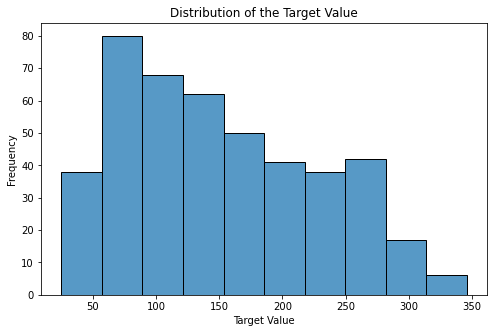

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# a histogram of the frequency of the target values
plt.figure(figsize=(8, 5))
sns.histplot(df['target'])
plt.title("Distribution of the Target Value")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

#### from the graph above we can the distribution of the target variables. So on the y axis we have the target value (disease progression) and on the x axis we have the frequency so it shows how many patients fell in that range. From the graph we can see that it is right-skewed where most of the target values are from 50-200 meaning that most patients have not too high or not too low disease progression

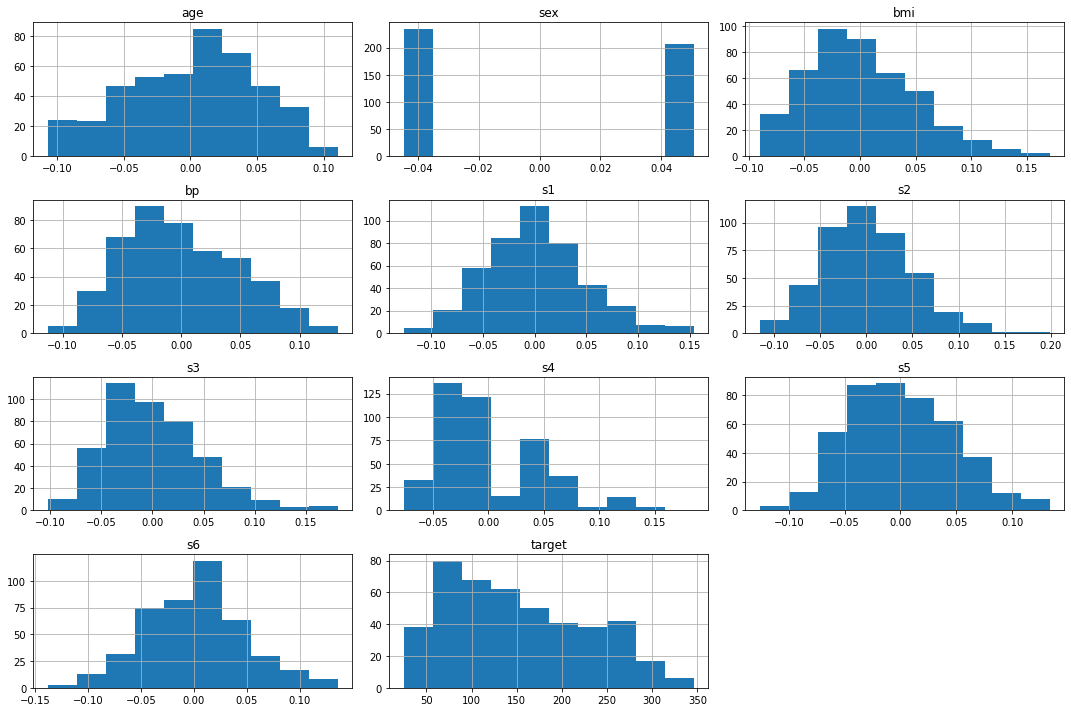

In [99]:
#create histograms for every feature we are looking at to help us understand the distribution of each feature and target
df.hist( figsize=(15, 10))
plt.tight_layout()
plt.show()

#### from the histograms above we can see the different distribution shapes from each feature. For the first one which is age, we can see that it is slightly skewed to the left, although most of the values are near the middle, there are some older patients are outliers. For the bmi feature it is rightly skewed, meaning that most patients have a BMI that is near the average with only a few outliers. 

# Perform any necessary data cleaning steps

In [100]:
#another check for missing values
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

#### did another check for missing values, and as you can see there are no missing values. So there is no need for any data cleaning

# Step 2: Linear Regression

### Implement a Simple Linear Regression model using BMI as the independent variable and the target variable as the dependent variable. 

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#using bmi as the feature
#set X as bmi as the independent varible
X = df[['bmi']]
#set y as the target variable as the dependent variable
y = df[['target']]

In [102]:
#split the data into training and testing sets
#splits the data into 80% training set and 20% testing set
#X_train and y_train are using to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
#Train the model and evaluate its performace using MAE, MSE, RMSE, and R^2
model = LinearRegression()
model.fit(X_train, y_train)

#makes the prediction on the test set
y_pred = model.predict(X_test)

In [104]:
#evaluates the model
#for mean absolute error (MSE) which represents the average of the absolute differences b/w the actual and predicted values
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

MAE:  52.259976445345536


#### It is important for the MAE number to be low, but from our results we can see that our model's predictions were off by 52.38 units from the actual value which is not bad or good

In [105]:
#evaluates model's performace using Mean Square Error, which is the average of the squared differences between the actual and predicted values
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  4061.8259284949268


#### with our results being 4226.14 this means there are large errors

In [106]:
#evaluates model's performace using Root Mean Squared Error (RMSE), which is just the square rrot of the MSE value
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  63.73245584860925


#### with our results of 65.01, this means that our predictions are off by 65 units 

In [107]:
#evaluates model's performace using R squared
r2 = r2_score(y_test, y_pred)  
print("R^2: ", r2)

R^2:  0.23335039815872138


#### with our r squared value being .233, this means that 77% of the variablilty is not explained for by the model. meaning that the model is not accurate

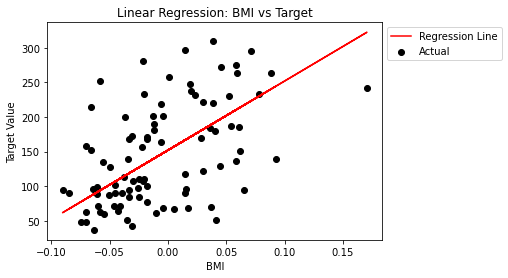

In [108]:
#visualize the model's predictions against the actual data
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Target Value')
plt.title('Linear Regression: BMI vs Target')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

#### From our plot above, we have the black dots representing the actual data points, this show us the patient's BMI compared to the disease progression. The red line is the predicted regression line by the model, this line shows us that the model predicted what the disease progression will increase when the BMI increases. Because the black data points like kind of spread all over, it shows us that our model's prediction was not close to the actual values

## Step 3: Multiple Regression

In [109]:
#Implement a Multiple Regression model using multiple independent variables to predict the target variable.
#set X all the variables except the target variable
X = df.drop('target', axis=1)
#set y as the target variable as the dependent variable
y = df['target']

In [110]:
#split the data into training and testing sets
#splits the data into 80% training set and 20% testing set
#X_train and y_train are using to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
#Train the model and evaluate its performace using MAE, MSE, RMSE, and R^2
model = LinearRegression()
model.fit(X_train, y_train)

#makes the prediction on the test set
y_pred = model.predict(X_test)

In [112]:
#evaluates the model
#for MAE which represents the average of the absolute differences 
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

MAE:  42.79389304196525


#### It is important for the MAE number to be low, but from our results we can see that our model's predictions were off by 42.79 units from the actual value which is not bad or good. But it is still not precise enough for making accurate predictions for each person

In [113]:
#evaluates model's performace using MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  2900.1732878832313


In [114]:
#evaluates model's performace using RMSE
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

RMSE:  53.853256984914395


In [115]:
#evaluates model's performace using R squared
r2 = r2_score(y_test, y_pred)  
print("R^2: ", r2)

R^2:  0.4526066021617381


#### With our R squared value being 45%, this is better than the value from the linear regression but it is still not great because 55% of our variablilty is not explained for.

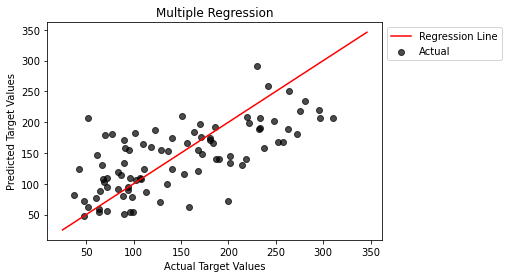

In [116]:
#Scatter plot of actual vs predicted target values
plt.scatter(y_test, y_pred, color='black', label='Actual', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Regression Line')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Multiple Regression')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

#### From our plot above, we have the actual data points in the black and we have our regression line from our model's prediction. As you can see the dots are still scattered around and not falling along the regession line, we can see that the predictions from the model is not reliable or accurate.

## Step 4: Polynomial Regression

In [133]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Implement a Polynomial Regression model by extending the linear regression model with polynomial features. 
#sets X as the bmi
X = df[['bmi']]  
#set y as the target variable as the dependent variable
y = df['target']   

#split the data into training and testing sets
#splits the data into 80% training set and 20% testing set
#X_train and y_train are using to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
#Train and test the model while comparing the results with those from the linear and multiple regression models. 
degree = 2
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

model = LinearRegression()
model.fit(X_train_poly, y_train)

#makes the prediction on the test set
y_pred = model.predict(X_test_poly)

In [135]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, y_pred)
print("R^2: ", r2)

MAE:  52.38391176015266
MSE:  4085.0254808716336
RMSE:  63.91420406194255
R^2:  0.22897159712056647


#### From our results from MEA metric we can see that we are off by 52 units from the actual value. This is higher than the multiple regression model and similar to the linear regression model. Since out MSE value is higher than our previous multiple regression model, it is making more larger errors, this could mean there is potential of overfitting. Our r squared value is 23% which is alot worse than our multiple regression but similar to the linear regression model.

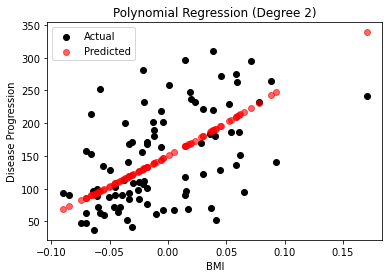

In [136]:
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title(f'Polynomial Regression (Degree 2)')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

#### as you can see from the visual above that the black (actual data points) don't align with the red dots (predicted values)

## with degree = 3

In [137]:
#Train and test the model while comparing the results with those from the linear and multiple regression models. 
degree = 3
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

model = LinearRegression()
model.fit(X_train_poly, y_train)

#makes the prediction on the test set
y_pred = model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, y_pred)
print("R^2: ", r2)

MAE:  52.181400333445666
MSE:  4064.4433837164374
RMSE:  63.752987253276515
R^2:  0.23285636640090257


#### As we can see from our MAE value for out polynomical regression (degree=3) model, we can see that the models' prediction is off by 52 units which is similar to MAE for degree 2. This means that increasing the degree doesn't make a difference. The MSE for degree= 2 is similar to MSE degree=3, which means that there are still large errors. Our RMSE degree=3 is similar to degree=2, which is 63.75, which means that there are 64 points of error meaning the model is still unable to predict accurately. The r squared results is still similar to degree=2 which means that the model is still underfitting and still weak

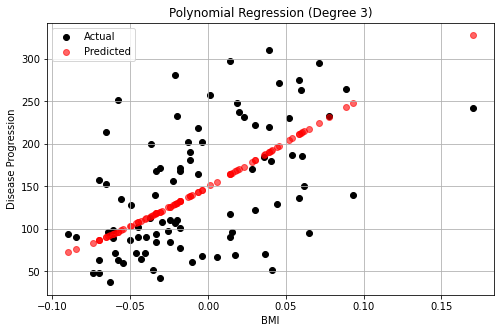

In [129]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title(f'Polynomial Regression (Degree {degree})')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.show()

#### As you can see from the plot about that the model was not accurate in predicts the values

## Degree = 5

In [146]:
#Train and test the model while comparing the results with those from the linear and multiple regression models. 
degree = 5
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

model = LinearRegression()
model.fit(X_train_poly, y_train)

#makes the prediction on the test set
y_pred = model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)
r2 = r2_score(y_test, y_pred)
print("R^2: ", r2)

MAE:  51.88461072285004
MSE:  4085.845566850978
RMSE:  63.920619262104914
R^2:  0.22881680993849418


#### As we can see from our MAE value for out polynomical regression (degree=5) model, we can see that the models' prediction is off by 51.9 units which is similar to MAE for degree 2 and degree 3. This means that increasing the degree doesn't make a difference. The MSE for degree 5 is similar to degree= 2 and degree=3, which means that there are still large errors. Our RMSE degreee 5 is miliar to degree=3 and degree=2, which is 63.92, which means that there are 64 points of error meaning the model is still unable to predict accurately. The r squared results is still similar to degree 3 and degree=2 which means that the model is still underfitting and still weak

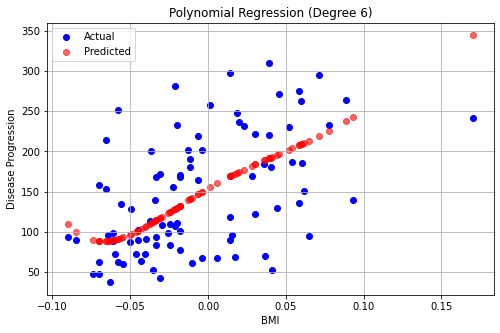

In [147]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.6)
plt.title(f'Polynomial Regression (Degree 6)')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Regularization with Ridge and Lasso Regression 

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

X = df.drop('target', axis=1)
y = df['target']

#split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Ridge Regression with alpha = 1.0
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Lasso Regression with alpha = 1.0
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=1.0))
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

In [78]:
def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Regression Performance:")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"r^2  : {r2:.2f}")

evaluate_model("Ridge", y_test, ridge_pred)
evaluate_model("Lasso", y_test, lasso_pred)


Ridge Regression Performance:
MAE : 42.81
MSE : 2892.00
RMSE: 53.78
R²  : 0.45

Lasso Regression Performance:
MAE : 42.80
MSE : 2824.56
RMSE: 53.15
R²  : 0.47


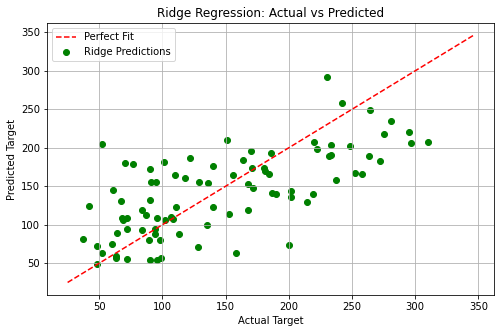

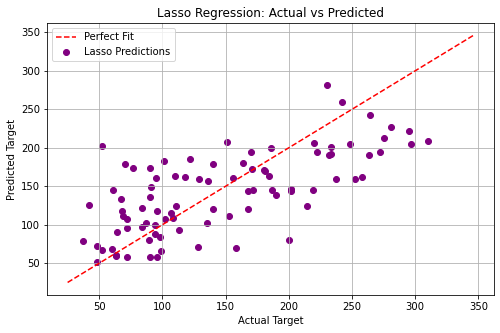

In [79]:
# Plot actual vs predicted values for Ridge
plt.figure(figsize=(8, 5))
plt.scatter(y_test, ridge_pred, color='green', label='Ridge Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs predicted values for Lasso
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lasso_pred, color='purple', label='Lasso Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Lasso Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


## Step 6: Model Comparison and Analysis